In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import datetime
import xarray as xr
from salishsea_tools import tidetools, geo_tools, viz_tools
import ONC_patrols as onc
from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [4]:
nowcast = xr.open_dataset(
    'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')

In [5]:
nowcast_salinity = nowcast.salinity
nowcast_temperature = nowcast.temperature

In [6]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [7]:
ctd_2015 = sio.loadmat('/ocean/rich/home/metro/venus_adcp/matlabPSF/CitSci_Final.mat')
ctd_2016 = sio.loadmat('/ocean/rich/home/metro/venus_adcp/matlabPSF/CitSci_Final2016.mat')

In [8]:
ctd_2015_data = ctd_2015[list(ctd_2015.keys())[3]]
ctd_2016_data = ctd_2016[list(ctd_2016.keys())[3]]

In [9]:
ctd_2015_dtype = ctd_2015_data.dtype
ctd_2016_dtype = ctd_2016_data.dtype

In [10]:
ctd2015data = {n: ctd_2015_data[n][0, 0] for n in ctd_2015_dtype.names}
ctd2016data = {n: ctd_2016_data[n][0, 0] for n in ctd_2016_dtype.names}

In [11]:
print(ctd2015data.keys())
print(ctd2016data.keys())

dict_keys(['patrol', 'ID', 'stn', 'mtime', 'lat', 'long', 'pr', 'mtimes', 'temp', 'sal', 'cond', 'depth', 'stnN', 'o2', 'chl', 'comment'])
dict_keys(['patrol', 'ID', 'stn', 'mtime', 'lat', 'long', 'pr', 'mtimes', 'temp', 'sal', 'cond', 'depth', 'stnN', 'o2SAT', 'o2uM', 'chl', 'comment'])


In [12]:
Stn2015 = ctd2015data['stnN'][0,:]

In [13]:
Stn2016 = ctd2016data['stnN'][0,:]

In [14]:
ID_2015 = np.array([ctd2015data['ID'][0,:][n][0] for n in range(2142)])
ID_2016 = np.array([ctd2016data['ID'][0,:][n][0] for n in range(1165)])

In [15]:
patrol_2015 = np.array([ctd2015data['patrol'][0,:]])
patrol_2016 = np.array([ctd2016data['patrol'][0,:]])

In [16]:
ctd2016data['lat'][0,:].shape

(1165,)

In [17]:
ctd2015data['long'][0,:].shape

(2142,)

In [18]:
base = datetime.datetime(2000, 1, 1)
dates_2015 = np.array([])
py_ctd_2015_times = np.array([base for i in range(2142)])
for n in range(2142):
    a = ((datetime.datetime.fromordinal(int(ctd2015data['mtime'][0,:][n])))
         + datetime.timedelta(days=ctd2015data['mtime'][0,:][n]%1)
         - datetime.timedelta(days = 366))
    py_ctd_2015_times[n] = a
    dates_2015 = np.append(dates_2015, datetime.date(a.year, a.month, a.day))
py_ctd_2016_times = np.array([base for i in range(1165)])
dates_2016 = np.array([])
for n in range(1165):
    b = ((datetime.datetime.fromordinal(int(ctd2016data['mtime'][0,:][n])))
         + datetime.timedelta(days=ctd2016data['mtime'][0,:][n]%1)
         - datetime.timedelta(days = 366))
    py_ctd_2016_times[n] = b
    dates_2016 = np.append(dates_2016, datetime.date(b.year, b.month, b.day))

In [20]:
data = {'mtime' : np.append(ctd2015data['mtime'][0,:], ctd2016data['mtime'][0,:]),
        'lat' : np.append(ctd2015data['lat'][0,:], ctd2016data['lat'][0,:]),
        'lon' : np.append(ctd2015data['long'][0,:], ctd2016data['long'][0,:]),
        'ID' : np.append(ID_2015, ID_2016),
        'patrol': np.append(patrol_2015, patrol_2016),
        'time': np.append(py_ctd_2015_times, py_ctd_2016_times),
        'date': np.append(dates_2015, dates_2016),
        'station': np.append(Stn2015, Stn2016)}
stationdata = pd.DataFrame(data)
stationdata[:10]

,ID,date,lat,lon,mtime,patrol,station,time
0,PSFLND2015-02-16_01,2015-02-16,49.986738,-124.822141,736011.697907,1,1,2015-02-16 16:44:59.124996
1,PSFLND2015-02-16_02,2015-02-16,49.986782,-124.822243,736011.702466,1,1,2015-02-16 16:51:33.055559
2,PSFLND2015-02-16_03,2015-02-16,49.961587,-124.856736,736011.727781,1,2,2015-02-16 17:28:00.277814
3,PSFLND2015-02-16_04,2015-02-16,49.960653,-124.856381,736011.733140,1,2,2015-02-16 17:35:43.314781
4,PSFLND2015-02-16_05,2015-02-16,50.078240,-124.868398,736011.785290,1,4,2015-02-16 18:50:49.041700
5,PSFLND2015-02-16_06,2015-02-16,50.077821,-124.868130,736011.791713,1,4,2015-02-16 19:00:03.987151
6,PSFLND2015-02-16_07,2015-02-16,50.100239,-124.739698,736011.847963,1,7,2015-02-16 20:21:03.970587
7,PSFLND2015-02-16_08,2015-02-16,50.100432,-124.740207,736011.854413,1,7,2015-02-16 20:30:21.264697
8,PSFLND2015-02-16_09,2015-02-16,50.083331,-124.789848,736011.870040,1,8,2015-02-16 20:52:51.466668
9,PSFLND2015-02-16_10,2015-02-16,50.083181,-124.789804,736011.876294,1,8,2015-02-16 21:01:51.833360


In [21]:
Lund = stationdata.loc[stationdata['patrol'] == 1]

In [24]:
masked_2015_depths = np.ma.masked_invalid(ctd2015data['depth'])
masked_2015_sals = np.ma.masked_invalid(ctd2015data['sal'])
masked_2015_temps = np.ma.masked_invalid(ctd2015data['temp'])
masked_2016_depths = np.ma.masked_invalid(ctd2016data['depth'])
masked_2016_sals = np.ma.masked_invalid(ctd2016data['sal'])
masked_2016_temps = np.ma.masked_invalid(ctd2016data['temp'])

In [25]:
for n in range(2142):
    if np.ma.count(masked_2015_temps[:,n]) > 190:
        print(n)

In [26]:
masked_depths = np.ma.masked_array(np.zeros((200,3307)), mask = True)
masked_sals = np.ma.masked_array(np.zeros((200,3307)), mask = True)
masked_temps = np.ma.masked_array(np.zeros((200,3307)), mask = True)
for n in range(2142):
    masked_depths[:, n].mask = masked_2015_depths[:200,n].mask
    masked_depths[:,n] = masked_2015_depths[:200,n]
    masked_sals[:,n].mask = masked_2015_sals[:200,n].mask
    masked_sals[:,n] = masked_2015_sals[:200,n]
    masked_temps[:,n].mask = masked_2015_temps[:200,n].mask
    masked_temps[:,n] = masked_2015_temps[:200,n]
for n in range(1165):
    masked_depths[:, n+2142].mask = masked_2016_depths[:,n].mask
    masked_depths[:,n+2142] = masked_2016_depths[:,n]
    masked_sals[:,n+2142].mask = masked_2016_sals[:,n].mask
    masked_sals[:,n+2142] = masked_2016_sals[:,n]
    masked_temps[:,n+2142].mask = masked_2016_temps[:,n].mask
    masked_temps[:,n+2142] = masked_2016_temps[:,n]

In [27]:
deptht = nowcast.depth.values

In [28]:
from matplotlib.colors import LogNorm

In [29]:
def compare(patrolonlydata):
    fig, ax = plt.subplots(1,3, figsize = (21,8))
    end_index = patrolonlydata.shape[0]
    list_of_model_sal = np.ma.masked_array(np.zeros((200,end_index)), mask = True)
    list_of_model_temp = np.ma.masked_array(np.zeros((200,end_index)), mask = True)
    m = 0
    for index in patrolonlydata.index:
        Yind, Xind = geo_tools.find_closest_model_point(patrolonlydata.loc[[index]]['lon'].values[0],
                                                       patrolonlydata.loc[[index]]['lat'].values[0], 
                                                       X, Y, land_mask = bathy.mask)
        date = pd.Timestamp(patrolonlydata.loc[[index]]['time'].values[0]).to_pydatetime()
        for n in range(200):
            if masked_sals.mask[n, index] == False:
                land = np.abs((deptht - masked_depths[n, index])).argmin()
                if tmask[0,land,Yind,Xind] == 1:
                    if date.minute < 30:
                        before = datetime.datetime(year = date.year, month = date.month, 
                                                   day = date.day, hour = (date.hour), 
                                                   minute = 30) - datetime.timedelta(hours=1)
                        delta = (date - before).seconds / 3600
                        s_val = ((1-delta) * ((nowcast_salinity
                               .sel(time = before, depth = masked_depths[n, index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (delta)*((nowcast_salinity
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n, index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                        s_tem = ((1-delta) * ((nowcast_temperature
                               .sel(time = before, depth = masked_depths[n, index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (delta)*((nowcast_temperature
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n, index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                    if date.minute >= 30:
                        before = datetime.datetime(year = date.year, month = date.month, 
                                                   day = date.day, 
                                                   hour = (date.hour), minute = 30)
                        delta = (date - before).seconds / 3600
                        s_val = ((1-delta) * ((nowcast_salinity
                               .sel(time = before, depth = masked_depths[n,index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (delta)*((nowcast_salinity
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n,index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                        s_tem = ((1-delta) * ((nowcast_temperature
                               .sel(time = before, depth = masked_depths[n,index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (delta)*((nowcast_temperature
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n,index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                    list_of_model_sal[n, m].mask = False
                    list_of_model_sal[n, m] = s_val
                    list_of_model_temp[n, m].mask = False
                    list_of_model_temp[n, m] = s_tem
        m = m + 1
    #scatter
    l = 0
    for n in patrolonlydata.index:
        ax[0].plot(np.ma.masked_invalid(masked_sals[:,n]), 
                  np.ma.masked_invalid(list_of_model_sal[:,l]), 
                  'b.')
        l = l + 1
    ax[0].plot(np.arange(16, 32), np.arange(16,32), 'r-')
    ax[0].grid('on')
    ax[0].set_title('Observed Vs Modeled')
    ax[0].set_ylabel('Model')
    ax[0].set_xlabel('Observed')
    
    print('salinity: bias =  ' + str(-np.mean(np.ma.masked_invalid(np.array([masked_sals[:,n] for n in patrolonlydata.index]).T.flatten())) 
                           + np.mean(list_of_model_sal.flatten())))
    print('salinity: RMSE = ' + str(np.sqrt(np.sum((list_of_model_sal.flatten() 
                                              - np.array([masked_sals[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2) 
                                      / np.ma.count(list_of_model_sal.flatten()))))
    xbar = np.mean(np.ma.masked_invalid(np.array([masked_sals[:,n] for n in patrolonlydata.index])))
    print('salinity: Willmott = ' + str(1-(np.sum((list_of_model_sal.flatten() - 
                                            np.array([masked_sals[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2)  / 
                                     np.sum((np.abs(list_of_model_sal.flatten() - xbar) 
                                             + np.abs(np.array([masked_sals[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten() 
                                                               - xbar))**2))))
    #depth profile
    k = 0
    for n in patrolonlydata.index:
        ax[1].plot(np.ma.masked_invalid(masked_sals[:,n]), 
                  np.ma.masked_invalid(masked_depths[:,n]), 
                  linestyle='-', c='gray', alpha = 0.1, linewidth=5)
        ax[1].plot(list_of_model_sal[:,k], 
                   np.ma.masked_invalid(masked_depths[:,k]), 
                 linestyle='-', c='k', alpha = 0.2)
        k = k + 1
    ax[1].set_ylim(150,0)
    ax[1].set_ylabel('Depth (m)')
    ax[1].set_xlabel('Salinity')                       
      
    #map
    Yinds = np.array([])
    Xinds = np.array([])
    for n in patrolonlydata['station'].unique():
        Yind, Xind = geo_tools.find_closest_model_point(
            patrolonlydata.loc[patrolonlydata['station'] == n].iloc[0]['lon'],
            patrolonlydata.loc[patrolonlydata['station'] == n].iloc[0]['lat'],X, Y, land_mask = bathy.mask)
        Yinds = np.append(Yinds, Yind)
        Xinds = np.append(Xinds, Xind)
    ax[2].plot(Xinds, Yinds, '*', color = 'teal')
    viz_tools.plot_coastline(ax[2], grid)
    ax[2].set_ylim(np.amax(np.array([0, np.amin(Yinds) - 50])), np.amin(np.array([898, np.amax(Yinds) + 50])))
    ax[2].set_xlim(np.amax(np.array([0, np.amin(Xinds) - 50])), np.amin(np.array([398, np.amax(Xinds) + 50])))
    viz_tools.set_aspect(ax[2])
    
    fig, ax2 = plt.subplots(1,3, figsize = (21,8))
    
    l = 0
    for n in patrolonlydata.index:
        ax2[0].plot(np.ma.masked_invalid(masked_temps[:,n]), 
                  np.ma.masked_invalid(list_of_model_temp[:,l]), 
                  'b.')
        l = l + 1
    ax2[0].plot(np.arange(10, 25), np.arange(10,25), 'r-')
    ax2[0].grid('on')
    ax2[0].set_title('Observed Vs Modeled')
    ax2[0].set_ylabel('Model')
    ax2[0].set_xlabel('Observed')
    
    print('temperature: bias =  ' + str(-np.mean(np.ma.masked_invalid(np.array([masked_temps[:,n] for n in patrolonlydata.index]).T.flatten())) 
                           + np.mean(list_of_model_temp.flatten())))
    print('temperature: RMSE = ' + str(np.sqrt(np.sum((list_of_model_temp.flatten() 
                                              - np.array([masked_temps[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2) 
                                      / np.ma.count(list_of_model_temp.flatten()))))
    xbar = np.mean(np.ma.masked_invalid(np.array([masked_temps[:,n] for n in patrolonlydata.index])))
    print('temperature: Willmott = ' + str(1-(np.sum((list_of_model_temp.flatten() - 
                                            np.array([masked_temps[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2)  / 
                                     np.sum((np.abs(list_of_model_temp.flatten() - xbar) 
                                             + np.abs(np.array([masked_temps[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten() 
                                                               - xbar))**2))))
    #depth profile
    k = 0
    for n in patrolonlydata.index:
        ax2[1].plot(np.ma.masked_invalid(masked_temps[:,n]), 
                  np.ma.masked_invalid(masked_depths[:,n]), 
                  linestyle='-', c='gray', alpha = 0.1, linewidth=5)
        ax2[1].plot(list_of_model_temp[:,k], 
                   np.ma.masked_invalid(masked_depths[:,k]), 
                 linestyle='-', c='orange', alpha = 0.2)
        k = k + 1
    ax2[1].set_ylim(150,0)
    ax2[1].set_ylabel('Depth (m)')
    ax2[1].set_xlabel('Temperature')                       
      
    #map
    ax2[2].plot(Xinds, Yinds, '*', color = 'teal')
    viz_tools.plot_coastline(ax2[2], grid)
    ax2[2].set_ylim(np.amax(np.array([0, np.amin(Yinds) - 50])), np.amin(np.array([898, np.amax(Yinds) + 50])))
    ax2[2].set_xlim(np.amax(np.array([0, np.amin(Xinds) - 50])), np.amin(np.array([398, np.amax(Xinds) + 50])))
    viz_tools.set_aspect(ax2[2])
    
    return ax, ax2

# Lund

salinity: bias =  0.213833078244
salinity: RMSE = 0.5817295143
salinity: Willmott = 0.933413605673
temperature: bias =  0.0205906085502
temperature: RMSE = 0.362946268793
temperature: Willmott = 0.981849937356


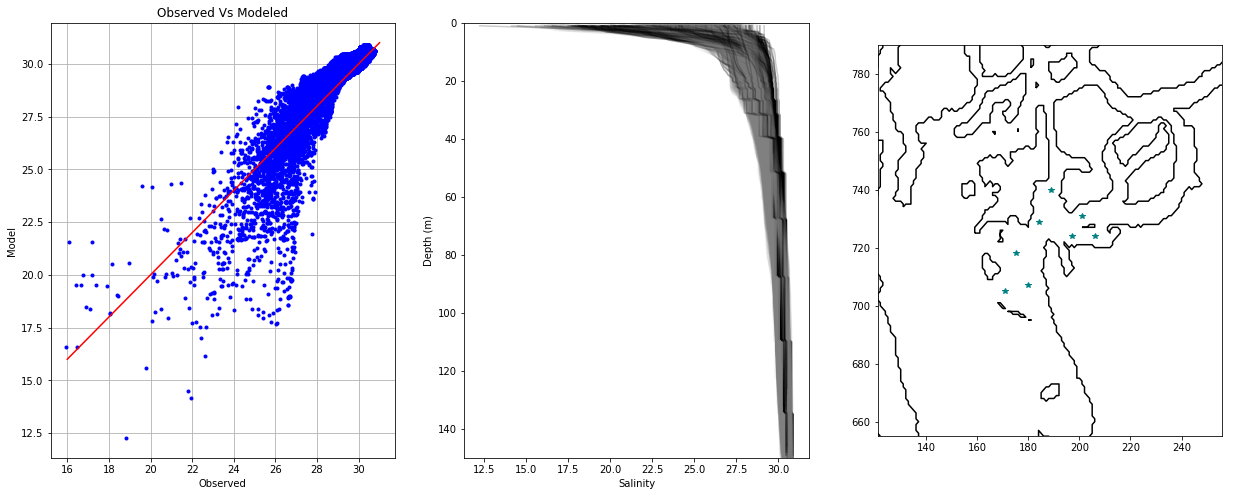

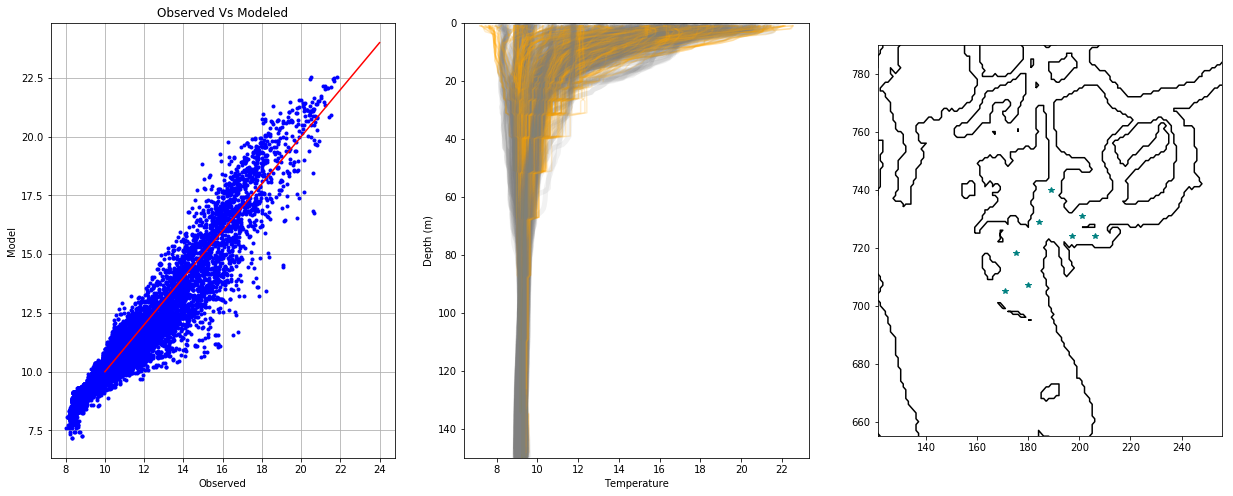

In [30]:
compare(stationdata.loc[stationdata['patrol'] == 1]);

In [31]:
secondpatrol = stationdata.loc[stationdata['patrol'] == 2]

# Powell River

salinity: bias =  0.157451293815
salinity: RMSE = 0.594817175977
salinity: Willmott = 0.928980886225
temperature: bias =  -0.106200668746
temperature: RMSE = 0.483897106338
temperature: Willmott = 0.975336708002


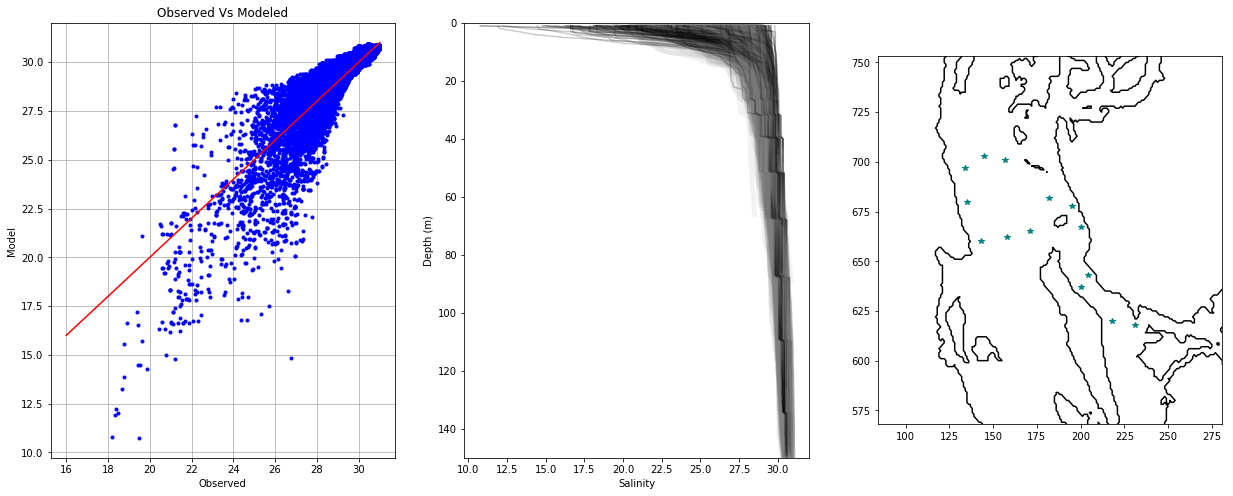

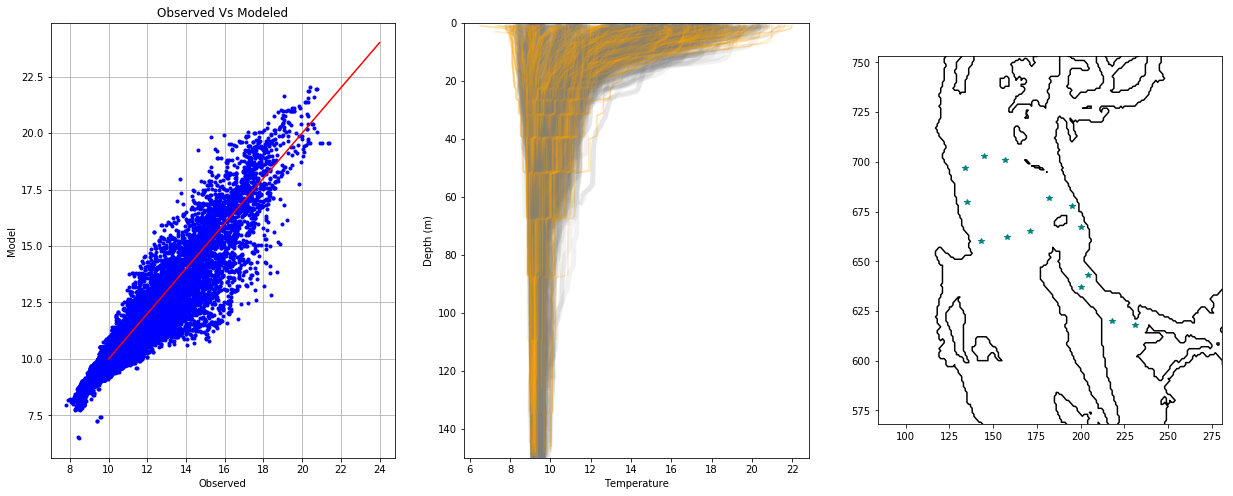

In [32]:
compare(secondpatrol);

In [33]:
thirdpatrol = stationdata.loc[stationdata['patrol'] == 3]

# Irvine/Sechelt

salinity: bias =  0.0354132138492
salinity: RMSE = 0.806143058463
salinity: Willmott = 0.938931372336
temperature: bias =  -0.123541952428
temperature: RMSE = 0.475809741177
temperature: Willmott = 0.979763599892


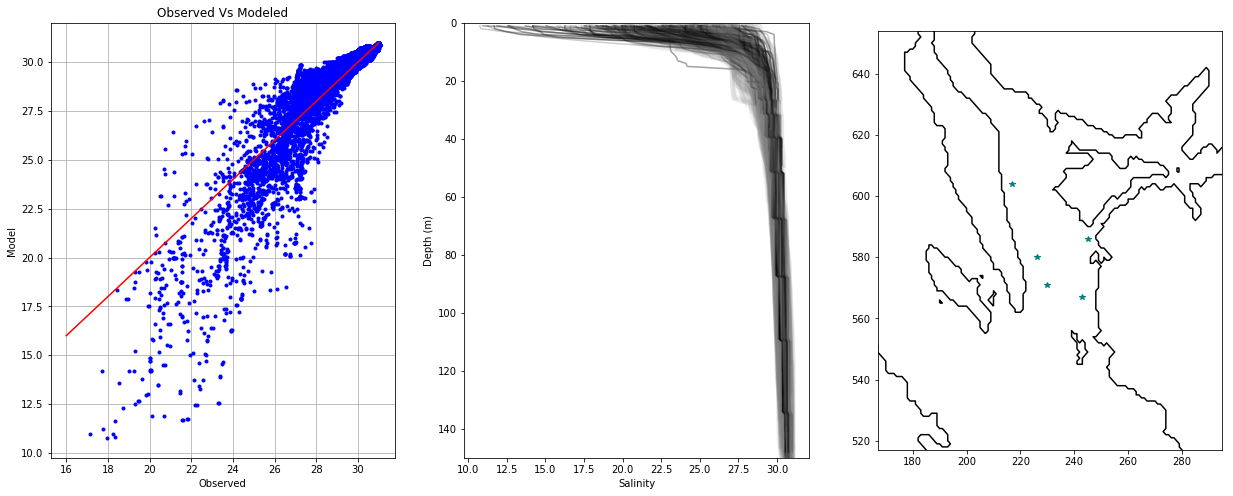

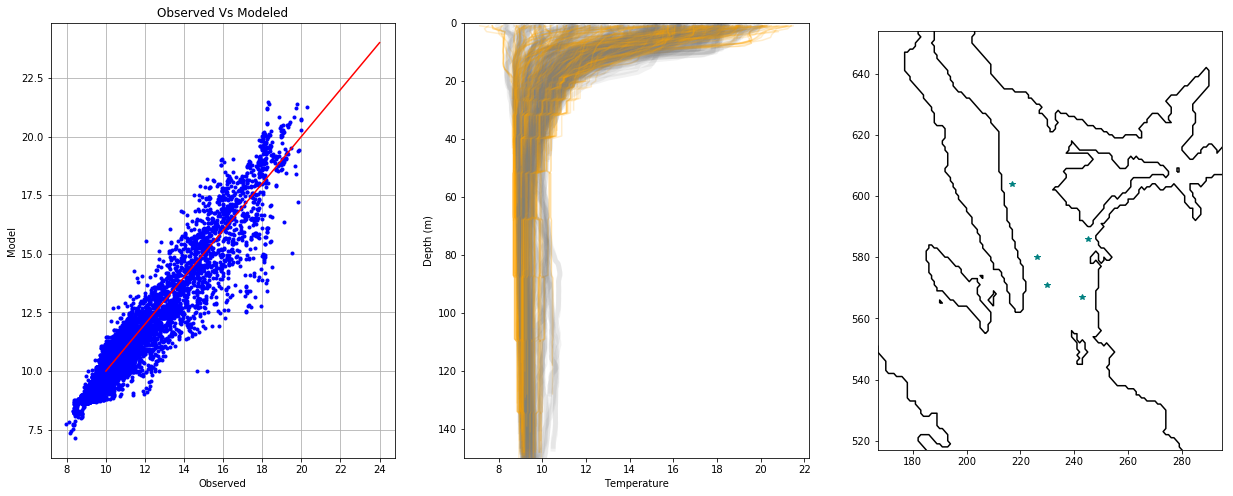

In [34]:
compare(thirdpatrol);

In [35]:
fourthpatrol = stationdata.loc[stationdata['patrol'] == 4]

# Baynes Sound

salinity: bias =  0.0893298039692
salinity: RMSE = 0.451276641171
salinity: Willmott = 0.943728010938
temperature: bias =  -0.0420714698792
temperature: RMSE = 0.534800153929
temperature: Willmott = 0.979401943623


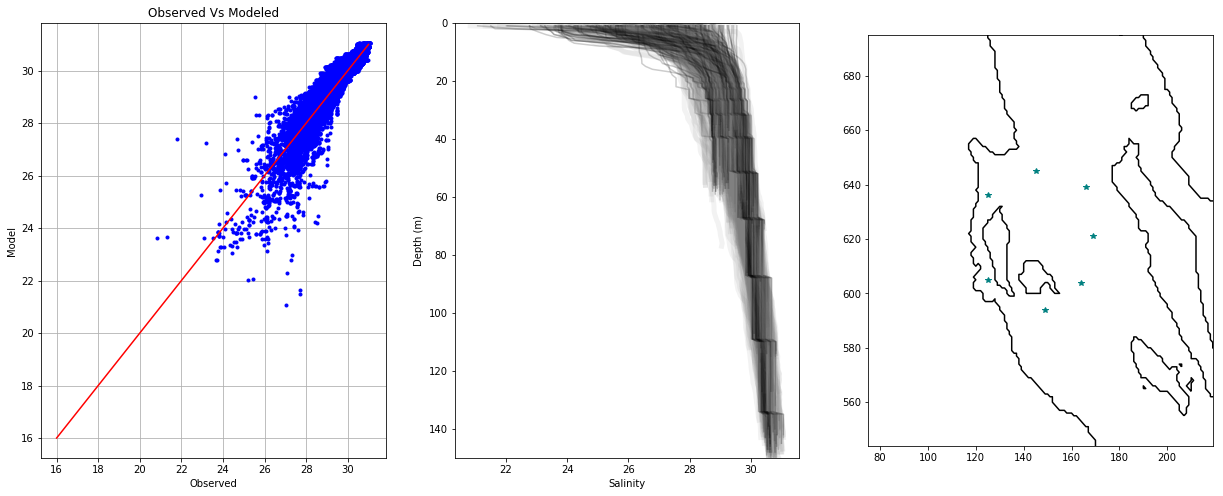

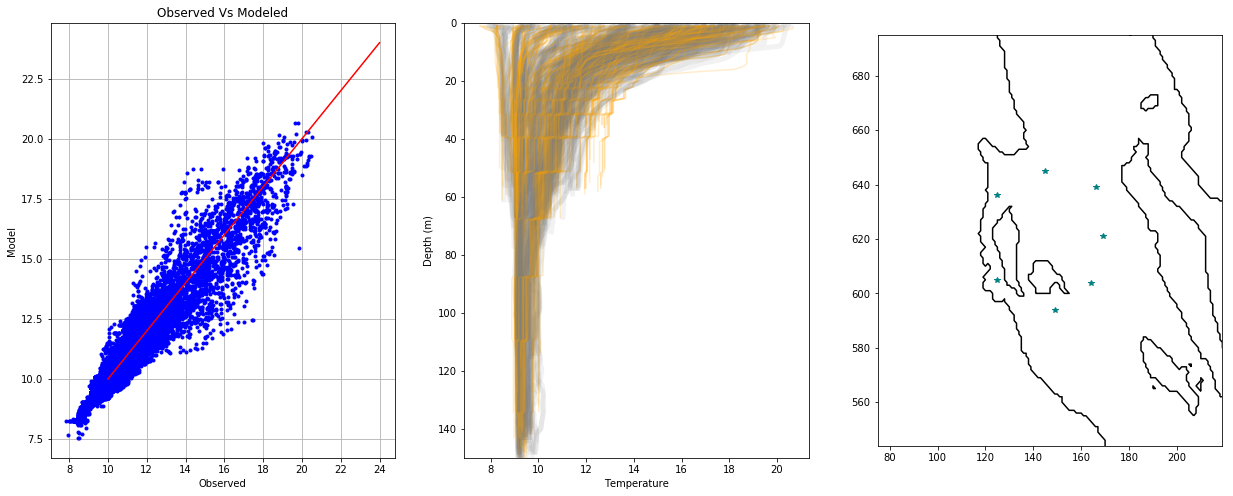

In [36]:
compare(fourthpatrol);

In [37]:
fifthpatrol = stationdata.loc[stationdata['patrol'] == 5]

# Nanaimo

salinity: bias =  0.0798250160512
salinity: RMSE = 0.622854718183
salinity: Willmott = 0.93098195694
temperature: bias =  -0.10151171883
temperature: RMSE = 0.439932043281
temperature: Willmott = 0.98024238123


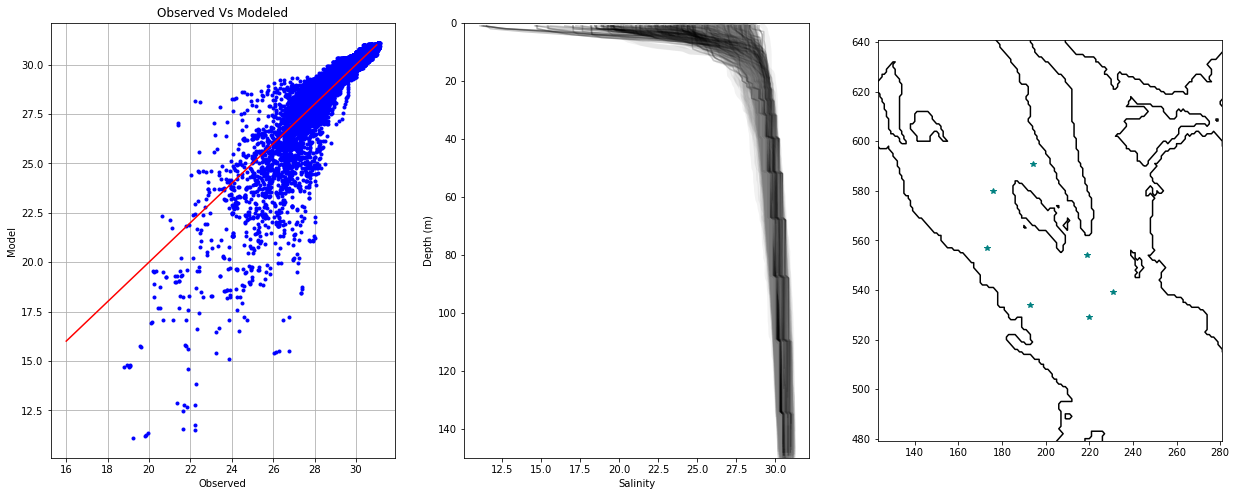

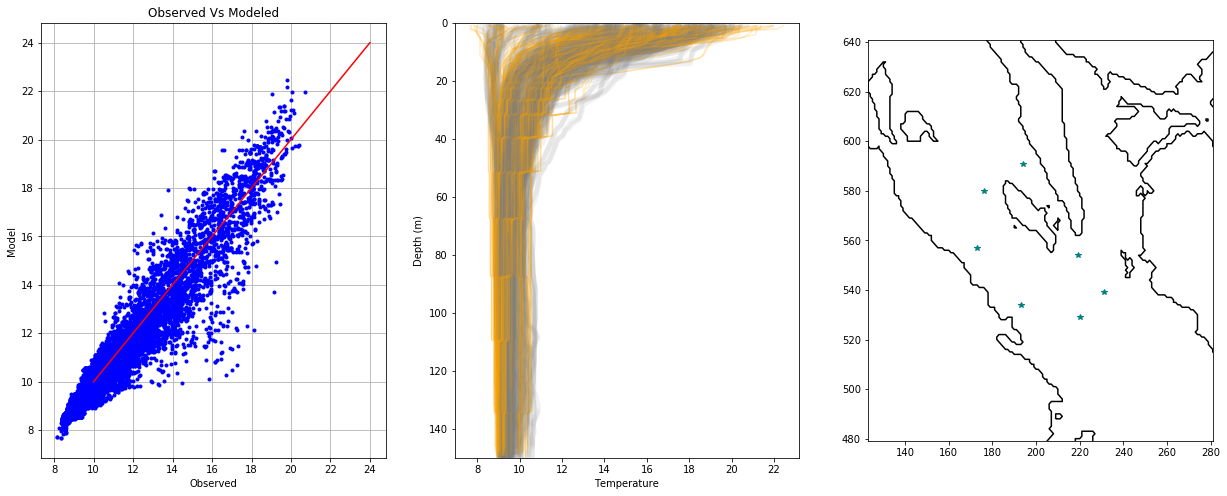

In [38]:
compare(fifthpatrol);

In [39]:
sixthpatrol = stationdata.loc[stationdata['patrol'] == 6]

# Campbell River

salinity: bias =  0.168206561675
salinity: RMSE = 0.470849238372
salinity: Willmott = 0.911367434887
temperature: bias =  -0.170044463794
temperature: RMSE = 0.510261210659
temperature: Willmott = 0.957350620785


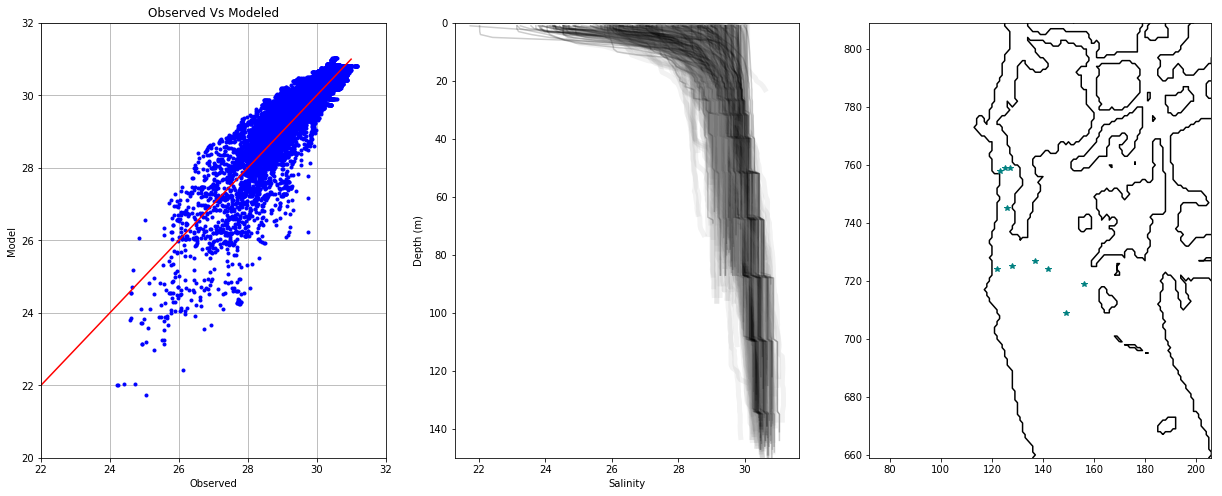

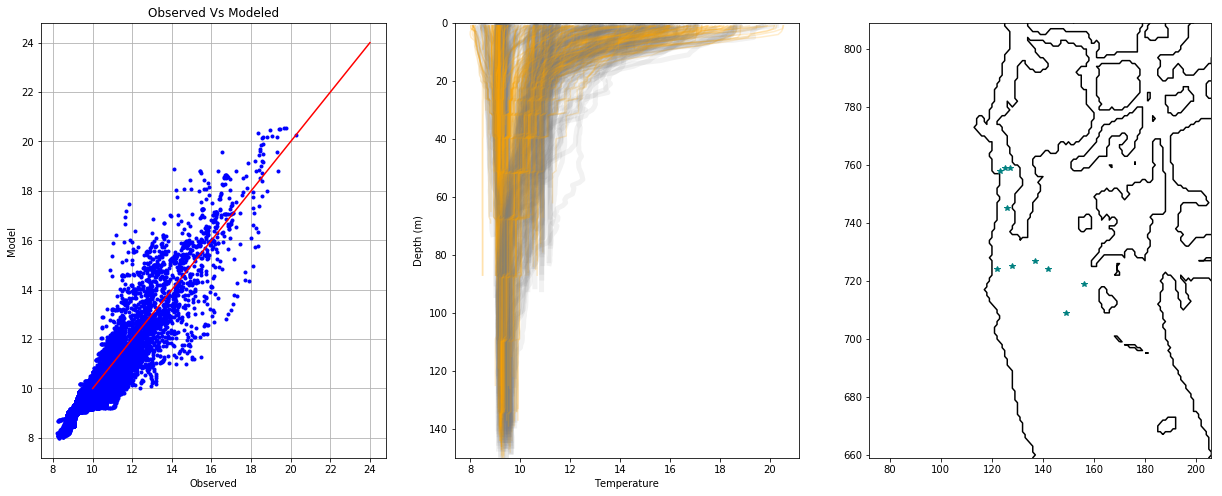

In [40]:
w, q = compare(sixthpatrol);
w[0].set_xlim(22, 32)
w[0].set_ylim(20, 32);

In [41]:
seventhpatrol = stationdata.loc[stationdata['patrol'] == 7]

# Ladysmith

salinity: bias =  -0.674455874064
salinity: RMSE = 0.974920740666
salinity: Willmott = 0.849900568612
temperature: bias =  0.326547472189
temperature: RMSE = 0.646630539443
temperature: Willmott = 0.979354076811


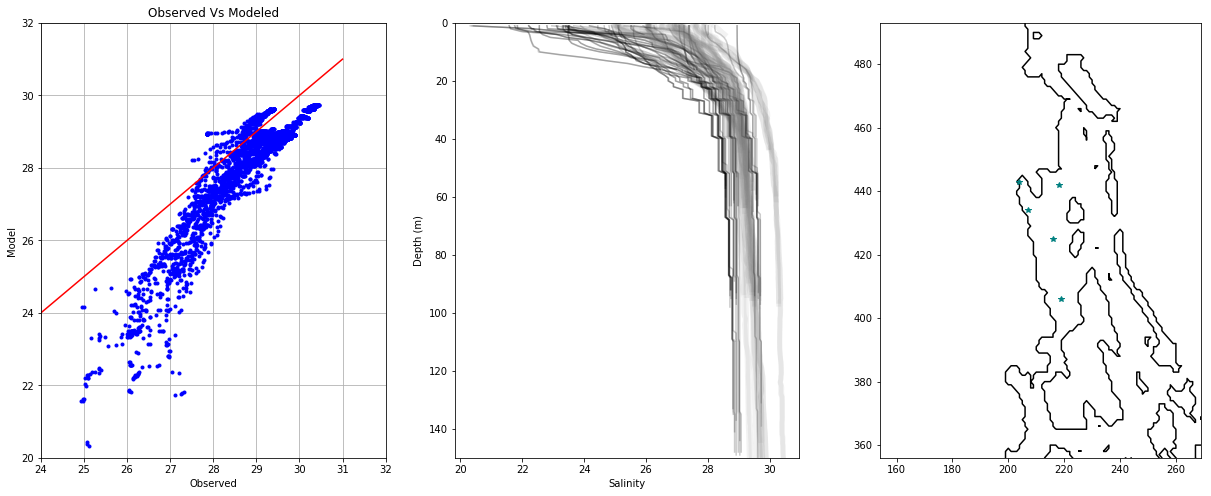

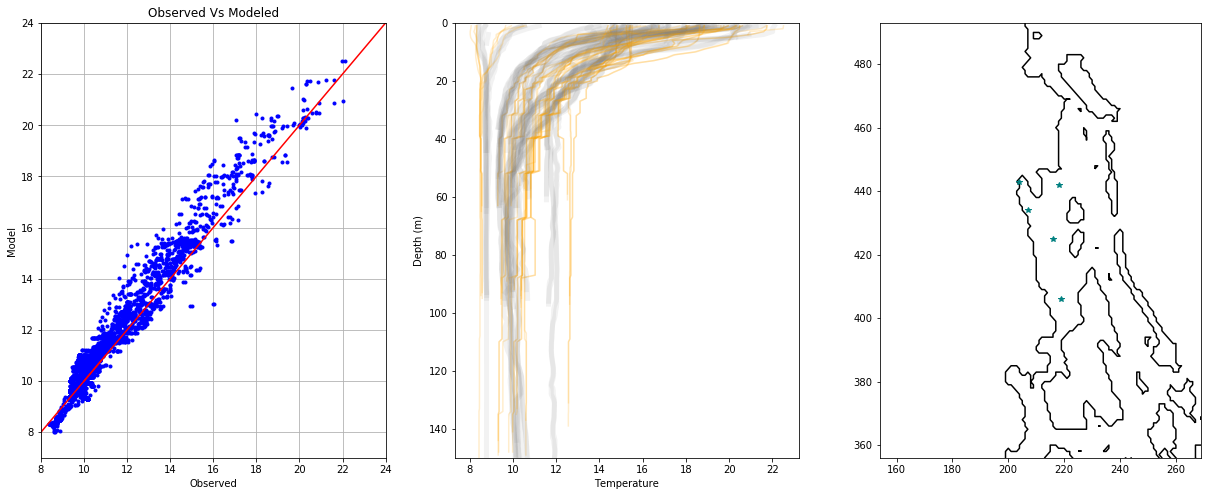

In [42]:
t, r = compare(seventhpatrol);
t[0].set_xlim(24, 32)
t[0].set_ylim(20, 32)
r[0].plot(np.arange(6,12), np.arange(6,12), 'r-')
r[0].set_xlim(8, 24)
r[0].set_ylim(7, 24);

# Steveston

salinity: bias =  -0.0897312975597
salinity: RMSE = 1.3263687031
salinity: Willmott = 0.921482234775
temperature: bias =  0.15638911268
temperature: RMSE = 0.682642509515
temperature: Willmott = 0.96039343701


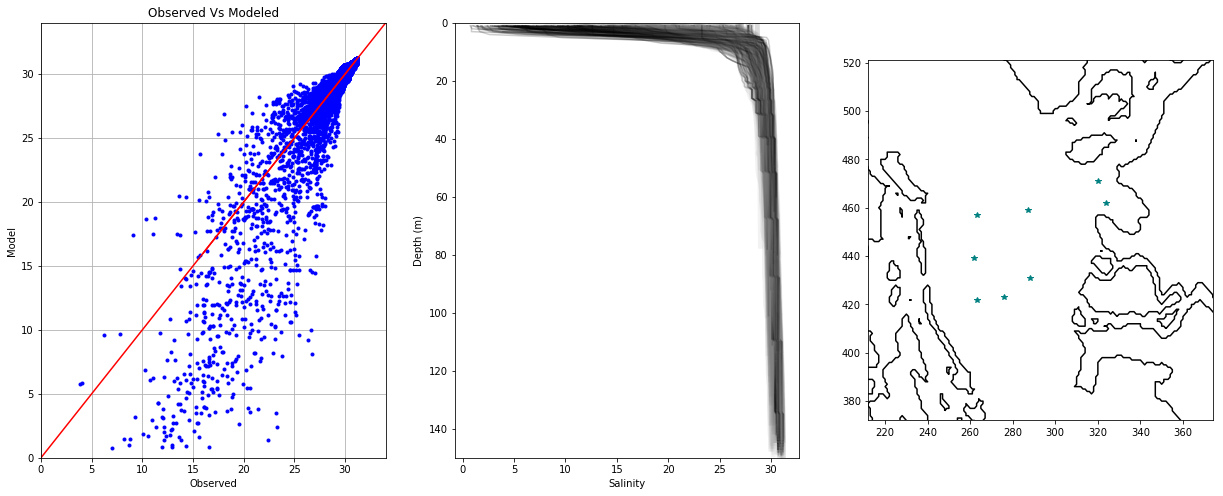

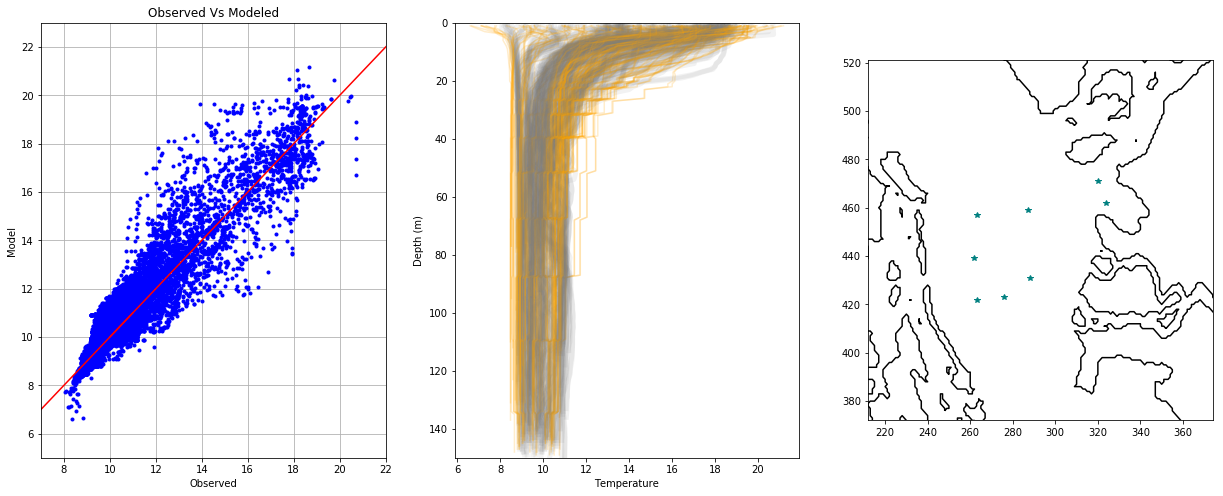

In [43]:
w, e = compare(stationdata.loc[stationdata['patrol'] == 8]);
w[0].plot(np.arange(0, 35), np.arange(0,35), 'r-')
w[0].set_ylim(0, 34)
w[0].set_xlim(0, 34)
e[0].plot(np.arange(6, 12), np.arange(6, 12), 'r-')
e[0].set_ylim(5, 23)
e[0].set_xlim(7, 22);

# Victoria 

salinity: bias =  -0.205038507738
salinity: RMSE = 0.727354878294
salinity: Willmott = 0.953215813017
temperature: bias =  0.317941816835
temperature: RMSE = 0.706943980644
temperature: Willmott = 0.929077199062


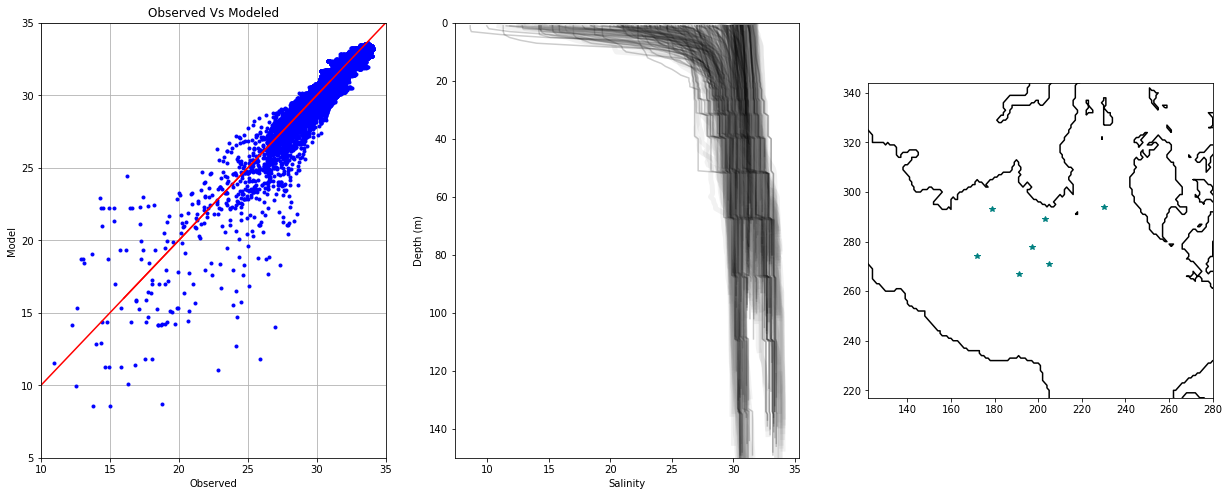

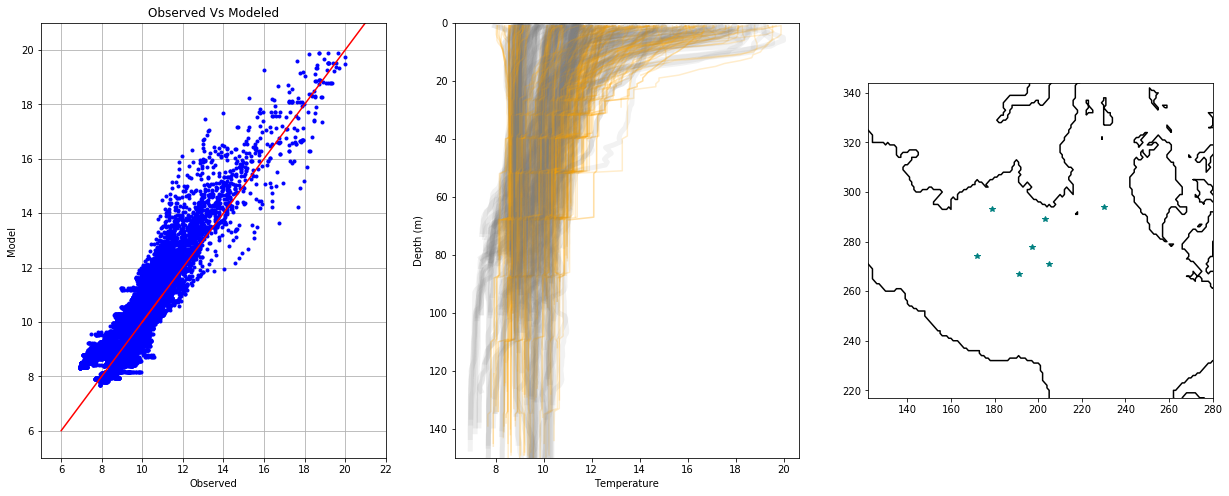

In [44]:
s, d = compare(stationdata.loc[stationdata['patrol'] == 9]);
s[0].plot(np.arange(9, 40), np.arange(9, 40), 'r-')
s[0].set_xlim(10, 35)
s[0].set_ylim(5, 35)
d[0].plot(np.arange(6, 12), np.arange(6, 12), 'r-')
d[0].set_xlim(5, 22)
d[0].set_ylim(5, 21);

# Cowichan Bay

salinity: bias =  -0.664866181326
salinity: RMSE = 1.11613356726
salinity: Willmott = 0.744997798197
temperature: bias =  0.277507026154
temperature: RMSE = 0.728837228268
temperature: Willmott = 0.956757702385


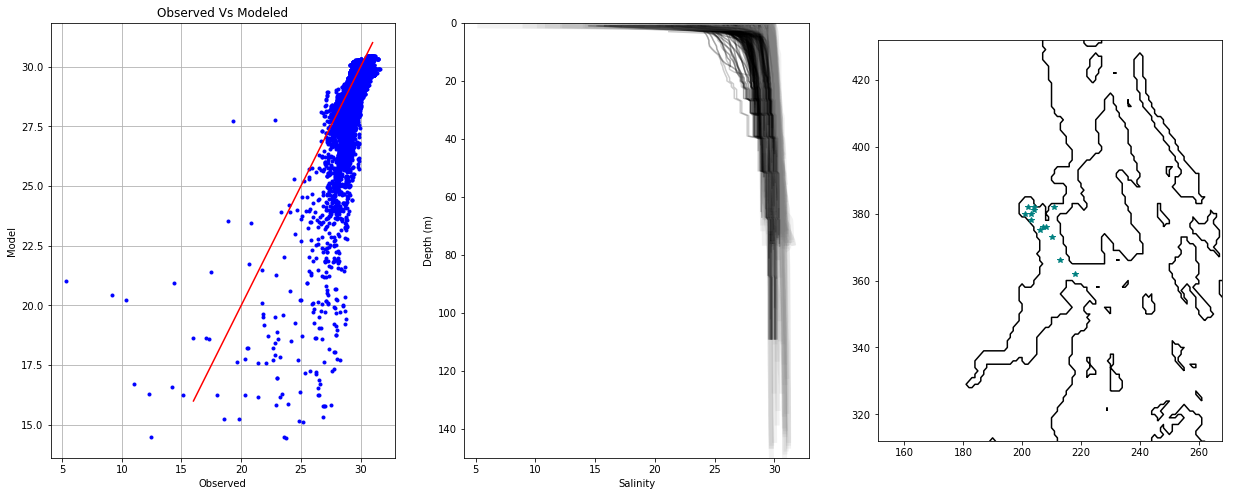

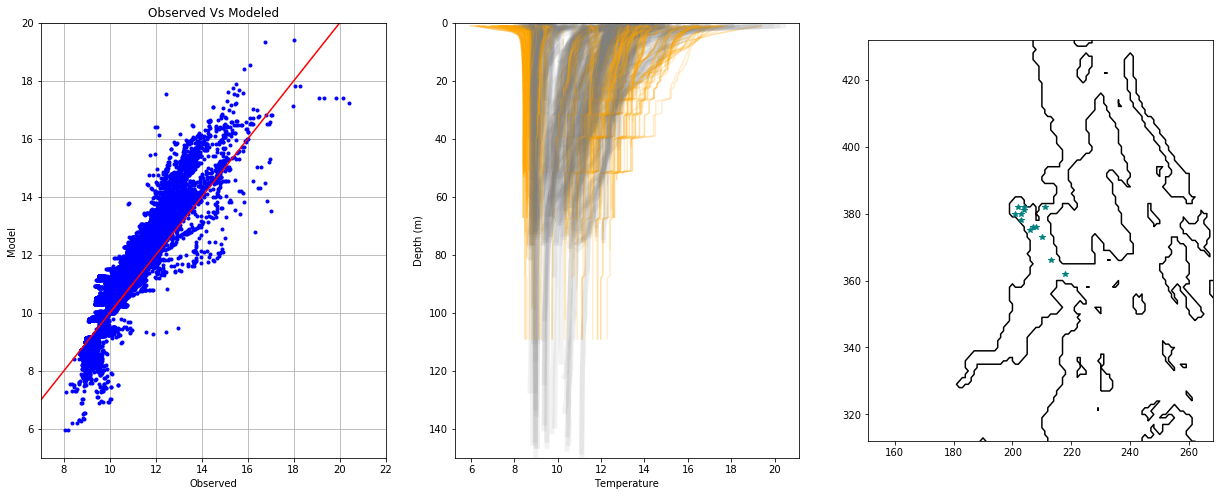

In [45]:
f, g = compare(stationdata.loc[stationdata['patrol'] == 10]);
g[0].set_xlim(7, 22)
g[0].set_ylim(5, 20)
g[0].plot(np.arange(3, 12), np.arange(3, 12), 'r-');

|                | sal_bias         | sal_rmse       | sal_wss        | temp_bias        | temp_rmse      | temp_wss       |
|----------------|------------------|----------------|----------------|------------------|----------------|----------------|
| Lund           | 0.213833078244   | 0.5817295143   | 0.933413605673 | 0.0205906085502  | 0.362946268793 | 0.981849937356 |
| Powell River   | 0.157451293815   | 0.594817175977 | 0.928980886225 | -0.106200668746  | 0.483897106338 | 0.975336708002 |
| Irvine         | 0.0354132138492  | 0.806143058463 | 0.938931372336 | -0.123541952428  | 0.475809741177 | 0.979763599892 |
| Baynes Sound   | 0.0893298039692  | 0.451276641171 | 0.943728010938 | -0.0420714698792 | 0.534800153929 | 0.979401943623 |
| Nanaimo        | 0.0798250160512  | 0.622854718183 | 0.93098195694  | -0.10151171883   | 0.439932043281 | 0.98024238123  |
| Campbell River | 0.168206561675   | 0.470849238372 | 0.911367434887 | -0.170044463794  | 0.510261210659 | 0.957350620785 |
| Ladysmith      | -0.674455874064  | 0.974920740666 | 0.849900568612 | 0.326547472189   | 0.646630539443 | 0.979354076811 |
| Steveston      | -0.0897312975597 | 1.3263687031   | 0.921482234775 | 0.15638911268    | 0.682642509515 | 0.96039343701  |
| Victoria       | -0.205038507738  | 0.727354878294 | 0.953215813017 | 0.317941816835   | 0.706943980644 | 0.929077199062 |
| Cowichan Bay   | -0.664866181326  | 1.11613356726  | 0.744997798197 | 0.277507026154   | 0.728837228268 | 0.956757702385 |